read in from kn.her.all,
each row looks like this:
A1B-B2A 0.012168 -20.5323038958 -8.38054968975 -12.211337151
A1B-B2C -0.000907891 -16.4984526904 -8.38054968975 -8.17965538055
A1B-B2D 0.000124631 -16.658838517 -8.38054968975 -8.33986726217
A1B-A3B 0.00878509 -14.7388725802 -8.38054968975 -6.41973451525

for row 1, it means dde for A1B-B2A is 0.012168, de for A1B is -8.38054968975, de for B2A is -12.211337151

now read all rows and get the follwing data:
average de for all positions (263 total), in this case, add all the de for that position and divide by count, for example at position 1, add up all the de that has 1 in it, aka add all A1B,A1C,and A1D and divide by count

average dde for all two positions, 263*263 total, add all the dde for those two positions and divide by count, for example at position (1,2), all the column that has 1 and 2 (average dde value of 2 and 1 should be the same)

In [23]:
# Read the file
data = []
with open('kn.her2.all', 'r') as file:
    for line in file:
        parts = line.split()
        pair = parts[0]
        dde = float(parts[1])
        de1 = float(parts[2])
        de2 = float(parts[3])
        data.append((pair, dde, de1, de2))

# Calculate average de for all positions
position_de = {}
for row in data:
    pair, de12, de1, de2 = row
    pos1, pos2 = pair.split('-')
    pos1 = ''.join(filter(str.isdigit, pos1))  # Extract position number(s)
    pos2 = ''.join(filter(str.isdigit, pos2))
    
    if pos1 not in position_de:
        position_de[pos1] = []
    position_de[pos1].append(de1)
    
    if pos2 not in position_de:
        position_de[pos2] = []
    position_de[pos2].append(de2)

average_de = {pos: sum(values) / len(values) for pos, values in position_de.items()}

# Calculate average dde for all two positions
position_dde = {}
for row in data:
    pair, dde, _, _ = row
    pos1, pos2 = pair.split('-')
    pos1 = ''.join(filter(str.isdigit, pos1))  # Extract position number(s)
    pos2 = ''.join(filter(str.isdigit, pos2))
    
    key = tuple(sorted((pos1, pos2)))
    if key not in position_dde:
        position_dde[key] = []
    position_dde[key].append(dde)

average_dde = {key: sum(values) / len(values) for key, values in position_dde.items()}

# # Print results
# print("Average de for all positions:")
# for pos, avg in average_de.items():
#     print(f"Position {pos}: {avg}")

# print("\nAverage dde for all two positions:")
# for key, avg in average_dde.items():
#     print(f"Positions {key}: {avg}")

#verified: pos 140 -148: (5.61299 + 3.75478 + 4.91495+2.06389+2.85445+2.98978+5.18354+8.50879+5.2042)/9 = 4.56526333333

# Create a dictionary to store all ΔΔE values for each pair of positions
all_dde_values = {}
for row in data:
    pair, dde, _, _ = row
    pos1, pos2 = pair.split('-')
    pos1 = ''.join(filter(str.isdigit, pos1))  # Extract position number(s)
    pos2 = ''.join(filter(str.isdigit, pos2))
    
    # Ensure pos1 is always smaller than pos2
    if int(pos1) > int(pos2):
        key = (pos2, pos1)
    else:
        key = (pos1, pos2)
    if key not in all_dde_values:
        all_dde_values[key] = []
    all_dde_values[key].append(dde)

# # Print a sample of the dictionary
# print("Sample of all ΔΔE values for each pair of positions:")
# # Print the dictionary values for positions (140, 148) and (148, 140)
# print(f"Positions (140, 148): {all_dde_values.get(('140', '148'), 'Not found')}")
# print(f"Positions (148, 140): {all_dde_values.get(('148', '140'), 'Not found')}")

# # Print all key-value pairs in the dictionary
# print("All ΔΔE values for each pair of positions:")
# for key, values in all_dde_values.items():
#     print(f"Positions {key}: {values}")



In [24]:

# Sort the average_dde dictionary by values in descending order and get the top 10
top_10_dde = sorted(average_dde.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the results
print("Top 10 max ΔΔE values:")
for pair, value in top_10_dde:
    print(f"Positions {pair}: {value}")


Top 10 max ΔΔE values:
Positions ('140', '148'): 4.565263333333333
Positions ('6', '7'): 2.425144333333334
Positions ('157', '160'): 2.322911111111111
Positions ('119', '122'): 2.1759424444444444
Positions ('138', '148'): 1.8509174444444443
Positions ('143', '230'): 1.723989
Positions ('218', '219'): 1.5439490999999999
Positions ('219', '222'): 1.5369843333333333
Positions ('101', '113'): 1.3930683333333334
Positions ('143', '151'): 1.391748


darw a 3d curve with mplot3d, and blue red cmap, the x, y axis are pos1 and pos2, and z axis is the value of delta delta e from above

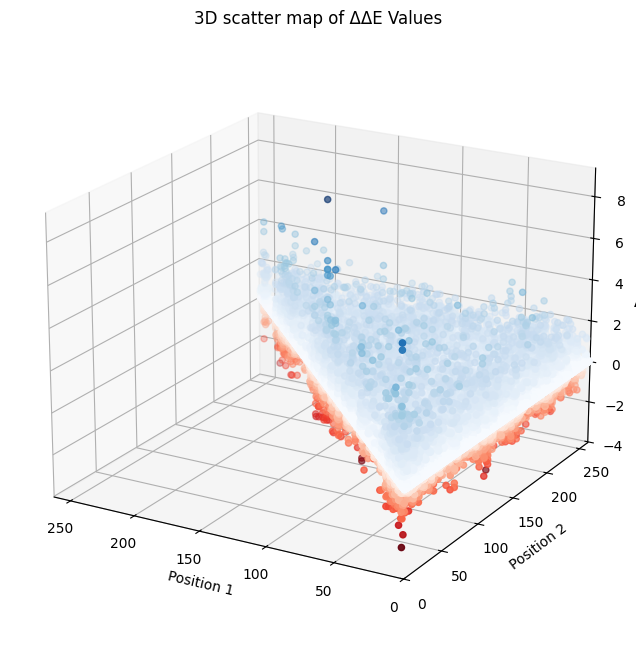

In [25]:
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for plotting
import numpy as np  # Import numpy for numerical operations

# Calculate average ΔΔE values from all_dde_values
x = [int(pos1) for pos1, pos2 in all_dde_values.keys() for _ in range(9)]
y = [int(pos2) for pos1, pos2 in all_dde_values.keys() for _ in range(9)]
z = [value for values in all_dde_values.values() for value in values]

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with blue-red colormap
# Separate positive and negative ΔΔE values
positive_indices = [i for i, val in enumerate(z) if val >= 0]
negative_indices = [i for i, val in enumerate(z) if val < 0]

# Scatter plot for positive ΔΔE values
sc_positive = ax.scatter(
    [x[i] for i in positive_indices],
    [y[i] for i in positive_indices],
    [z[i] for i in positive_indices],
    c=[z[i] for i in positive_indices],
    cmap='Blues',
    marker='o'
)

# Scatter plot for negative ΔΔE values
sc_negative = ax.scatter(
    [x[i] for i in negative_indices],
    [y[i] for i in negative_indices],
    [z[i] for i in negative_indices],
    c=[z[i] for i in negative_indices],
    cmap='Reds_r',
    marker='o'
)

# # Add color bar
# cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
# cbar.set_label('ΔΔE Value')

# Set axis labels and title
ax.set_title('3D scatter map of ΔΔE Values')
ax.set_xlabel('Position 1')
ax.set_ylabel('Position 2')
ax.set_zlabel('ΔΔE')

# # Draw a light gray transparent plane on z = 0
# x_plane, y_plane = np.meshgrid(range(264), range(264))
# z_plane = np.zeros_like(x_plane)
# ax.plot_surface(x_plane, y_plane, z_plane, color='lightgray', alpha=0.5, linewidth=0, antialiased=False)


ax.set_xlim(263, 0)
ax.set_ylim(0, 263)

# Rotate the graph 90 degrees counterclockwise
ax.view_init(elev=20, azim=300) #160

# Show the plot
plt.show()


get the top10 highest ddes and bottom 5 lowest ddes and the index of the pairs

In [28]:
# Get the top 10 highest ΔΔE values
top_10_highest_dde = sorted(all_dde_values.items(), key=lambda x: x[1], reverse=True)[:10]

# Get the bottom 5 lowest ΔΔE values
bottom_5_lowest_dde = sorted(all_dde_values.items(), key=lambda x: x[1])[:5]

# Print the results
print("Top 10 highest ΔΔE values:")
for pair, value in top_10_highest_dde:
    print(f"Pair {pair}: {value}")

print("\nBottom 5 lowest ΔΔE values:")
for pair, value in bottom_5_lowest_dde:
    print(f"Pair {pair}: {value}")

Top 10 highest ΔΔE values:
Pair ('140', '148'): [5.61299, 3.75478, 4.91495, 2.06389, 2.85445, 2.98978, 5.18354, 8.50879, 5.2042]
Pair ('138', '148'): [4.90052, 2.36156, 3.5258, 1.84006, 2.1318, 1.22494, 0.663299, 0.388454, -0.378176]
Pair ('110', '142'): [3.94428, 1.10187, 1.10082, 0.821948, 0.0165643, 0.00561793, 0.820334, 0.0154085, 0.00504396]
Pair ('32', '222'): [3.85822, 1.11419, 0.418337, 1.61561, 0.150405, 0.000380842, 1.61816, 0.155331, 0.00298688]
Pair ('157', '160'): [3.74083, 6.0882, 2.96766, 0.98979, 2.54117, 0.528383, 0.987727, 2.538, 0.52444]
Pair ('60', '182'): [3.73186, 1.25069, 1.25044, 0.637038, -0.000467651, -0.00212926, 1.81126, 0.210943, 0.208103]
Pair ('125', '126'): [3.41945, 1.94785, 1.06415, 1.13861, 0.409541, -0.505762, 1.99072, 0.870751, 0.319431]
Pair ('123', '127'): [3.3571, 1.00063, 1.002, 0.727731, 0.0149303, 0.0153366, 0.738616, 0.00460955, 0.00527838]
Pair ('28', '37'): [3.29631, 0.45718, 0.4635, 0.867173, -0.0427371, -0.0398129, 1.1544, 0.033619, 0.036

just like the folloinwg code, but instea of drawing 4,4,8, draw 15 trangles with top 10 and bottom 5 dde as coordinate 4,4,4+dde:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure for the irregular surface
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')

# Define the coordinates for the irregular surface
coords = np.array([
    [0, 0, 0],  # ab
    [0, 4, 3],  # Ab
    [4, 0, 3],  # aB
    [4, 4, 8]   # AB
])

labels = ['ab', 'Ab', 'aB', 'AB']

# Create triangles for the irregular surface
# Triangle 1: ab(0,0,0), Ab(0,4,3), aB(4,0,3)
triangle1_x = np.array([[0, 0], [4, 0]])
triangle1_y = np.array([[0, 4], [0, 0]])
triangle1_z = np.array([[0, 3], [3, 0]])

# Triangle 2: Ab(0,4,3), aB(4,0,3), AB(4,4,6)
triangle2_x = np.array([[0, 4], [4, 4]])
triangle2_y = np.array([[4, 0], [4, 0]])
triangle2_z = np.array([[3, 3], [8, 3]])

# Plot the two triangles separately
# Plot triangle 1: ab(0,0,0), Ab(0,4,3), aB(4,0,3)
triangle1_vertices = np.array([[0, 0, 0], [0, 4, 3], [4, 0, 3]])
ax2.plot_trisurf(triangle1_vertices[:, 0], triangle1_vertices[:, 1], triangle1_vertices[:, 2], alpha=0.7, cmap='viridis')

# Plot triangle 2: Ab(0,4,3), aB(4,0,3), AB(4,4,4.5)  
triangle2_vertices = np.array([[0, 4, 3], [4, 0, 3], [4, 4, 8]])
ax2.plot_trisurf(triangle2_vertices[:, 0], triangle2_vertices[:, 1], triangle2_vertices[:, 2], alpha=0.7, color='blue')


# Add labels at the specified coordinates
for i, (coord, label) in enumerate(zip(coords, labels)):
    ax2.text(coord[0], coord[1], coord[2], label, fontsize=12, fontweight='bold')

# Set axis properties
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.set_title('ΔΔE > 0 (Synergistic Epistasis)', y=0.02)

# Hide grid lines
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_zlabel('')

# Draw vertical lines from each point down to the XY plane (z=0)
for coord in coords:
    ax2.plot([coord[0], coord[0]], [coord[1], coord[1]], [coord[2], 0], 'k--', linewidth=1)

# Define shadow coordinates for the outline on XY plane
shadow_x = [0, 4, 4, 0, 0]  # Rectangle outline
shadow_y = [0, 0, 4, 4, 0]  # Rectangle outline
shadow_z = [0, 0, 0, 0, 0]  # All on z=0 plane

# Draw shadow on the XY plane (z=0)
ax2.plot_surface(np.array([[0, 0], [4, 4]]), np.array([[0, 4], [0, 4]]), np.array([[0, 0], [0, 0]]), color='grey', alpha=0.5)
# plt.show()

extra_triangle_vertices = np.array([[0, 4, 3], [4, 0, 3], [4, 4, 6]])
ax2.plot_trisurf(extra_triangle_vertices[:, 0], extra_triangle_vertices[:, 1], extra_triangle_vertices[:, 2], alpha=0.3, cmap='viridis')

plt.show()

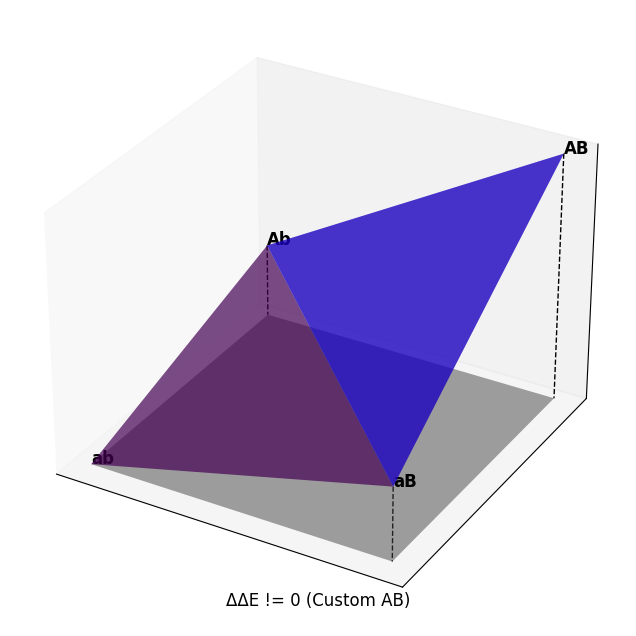

In [40]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_surface_with_custom_AB(AB_coords):
    import matplotlib.pyplot as plt

    # Create a new figure for the irregular surface
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Define the coordinates for the irregular surface
    coords = np.array([
        [0, 0, 0],  # ab
        [0, 4, 3],  # Ab
        [4, 0, 3],  # aB
        AB_coords   # AB
    ])

    labels = ['ab', 'Ab', 'aB', 'AB']

    # Create triangles for the irregular surface
    # Triangle 1: ab(0,0,0), Ab(0,4,3), aB(4,0,3)
    triangle1_vertices = np.array([[0, 0, 0], [0, 4, 3], [4, 0, 3]])
    ax.plot_trisurf(triangle1_vertices[:, 0], triangle1_vertices[:, 1], triangle1_vertices[:, 2], alpha=0.7, cmap='viridis')

    # Triangle 2: Ab(0,4,3), aB(4,0,3), AB
    triangle2_vertices = np.array([[0, 4, 3], [4, 0, 3], AB_coords])
    ax.plot_trisurf(triangle2_vertices[:, 0], triangle2_vertices[:, 1], triangle2_vertices[:, 2], alpha=0.7, color='blue')

    # Extra triangle: Ab(0,4,3), aB(4,0,3), AB
    extra_triangle_vertices = np.array([[0, 4, 3], [4, 0, 3], AB_coords])
    ax.plot_trisurf(extra_triangle_vertices[:, 0], extra_triangle_vertices[:, 1], extra_triangle_vertices[:, 2], alpha=0.3, cmap='viridis')

    # Add labels at the specified coordinates
    for i, (coord, label) in enumerate(zip(coords, labels)):
        ax.text(coord[0], coord[1], coord[2], label, fontsize=12, fontweight='bold')

    # Set axis properties
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('ΔΔE != 0 (Custom AB)', y=0.02)

    # Hide grid lines
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_zlabel('')

    # Draw vertical lines from each point down to the XY plane (z=0)
    for coord in coords:
        ax.plot([coord[0], coord[0]], [coord[1], coord[1]], [coord[2], 0], 'k--', linewidth=1)

    # Draw shadow on the XY plane (z=0)
    ax.plot_surface(np.array([[0, 0], [4, 4]]), np.array([[0, 4], [0, 4]]), np.array([[0, 0], [0, 0]]), color='grey', alpha=0.5)

    plt.show()

# Example usage:
plot_surface_with_custom_AB([4, 4, 10])  # Pass the custom AB coordinates as input

[[4.      4.      9.61299]
 [4.      4.      8.90052]
 [4.      4.      7.94428]
 [4.      4.      7.85822]
 [4.      4.      7.74083]
 [4.      4.      7.73186]
 [4.      4.      7.41945]
 [4.      4.      7.3571 ]
 [4.      4.      7.29631]
 [4.      4.      7.19849]
 [4.      4.      0.81255]
 [4.      4.      0.99794]
 [4.      4.      1.06893]
 [4.      4.      1.68467]
 [4.      4.      1.82909]]


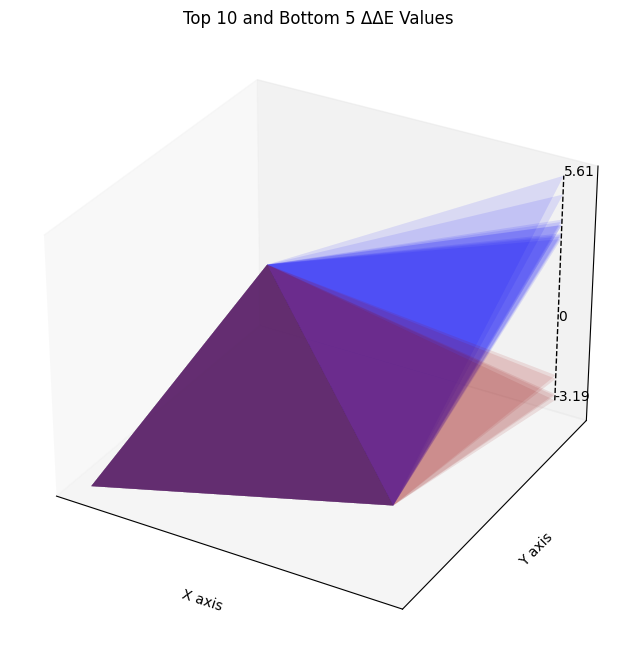

In [52]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# Define the coordinates for the top 10 highest and bottom 5 lowest ΔΔE values
coords = np.array([[4, 4, 4 + dde[0]] for _, dde in top_10_highest_dde] + [[4, 4, 4 + dde[0]] for _, dde in bottom_5_lowest_dde])
print(coords)

# Plot all 15 triangles using the provided function
# Plot all 15 triangles in one graph
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, projection='3d')

for coord in coords:
    # Define the coordinates for the irregular surface
    vertices = np.array([
        [0, 0, 0],  # ab
        [0, 4, 3],  # Ab
        [4, 0, 3],  # aB
        coord       # AB
    ])

    # Create triangles for the irregular surface
    triangle1_vertices = np.array([[0, 0, 0], [0, 4, 3], [4, 0, 3]])
    ax3.plot_trisurf(
        triangle1_vertices[:, 0],
        triangle1_vertices[:, 1],
        triangle1_vertices[:, 2],
        alpha=0.1,
        cmap='viridis'
    )

    triangle2_vertices = np.array([[0, 4, 3], [4, 0, 3], coord])
    color = 'blue' if coord[2] > 4 else 'red'
    ax3.plot_trisurf(
        triangle2_vertices[:, 0],
        triangle2_vertices[:, 1],
        triangle2_vertices[:, 2],
        alpha=0.1,
        color=color
    )

# Set axis properties
ax3.set_xlabel('X axis')
ax3.set_ylabel('Y axis')
ax3.set_zlabel('Z axis')
ax3.set_title('Top 10 and Bottom 5 ΔΔE Values')

# Hide ticks on all axes
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_zticks([])

# Draw a vertical line on the Z-axis at (4, 4, z)
z_min = coords[:, 2].min()  # Minimum z value
z_max = coords[:, 2].max()  # Maximum z value

# Plot the vertical line
ax3.plot([4, 4], [4, 4], [z_min, z_max], color='black', linestyle='--', linewidth=1)

# Generate tick labels for max, min, and 0 (z=4)
z_ticks = [z_min, 4, z_max]
z_labels = [f"{z_min - 4:.2f}", "0", f"{z_max - 4:.2f}"]

# Add tick labels along the vertical line
for tick, label in zip(z_ticks, z_labels):
    ax3.text(4, 4, tick, label, color='black', fontsize=10, ha='left')
plt.show()